In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
df = pd.read_csv("../filtered_data_2010.csv")
df

,Date,Value
0,2010M01,388.91
1,2010M02,390.41
2,2010M03,391.37
3,2010M04,392.67
4,2010M05,393.21
...,...,...
179,2024M12,425.40
180,2025M01,426.65
181,2025M02,427.09
182,2025M03,428.15


In [168]:
print("\ndata info:")
df.info()

print("\n missing val:")
print(df.isna().sum())

# convert date to proper datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%YM%m')

# basic statistics
print("deskriptif statistik:")
print(df.describe())


data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    184 non-null    object 
 1   Value   184 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB

 missing val:
Date     0
Value    0
dtype: int64
deskriptif statistik:
                                Date      Value
count                            184  184.00000
mean   2017-08-16 04:57:23.478260992  407.05875
min              2010-01-01 00:00:00  387.03000
25%              2013-10-24 06:00:00  397.34500
50%              2017-08-16 12:00:00  407.24500
75%              2021-06-08 12:00:00  416.60250
max              2025-04-01 00:00:00  429.64000
std                              NaN   11.16399


In [169]:
df

,Date,Value
0,2010-01-01,388.91
1,2010-02-01,390.41
2,2010-03-01,391.37
3,2010-04-01,392.67
4,2010-05-01,393.21
...,...,...
179,2024-12-01,425.40
180,2025-01-01,426.65
181,2025-02-01,427.09
182,2025-03-01,428.15


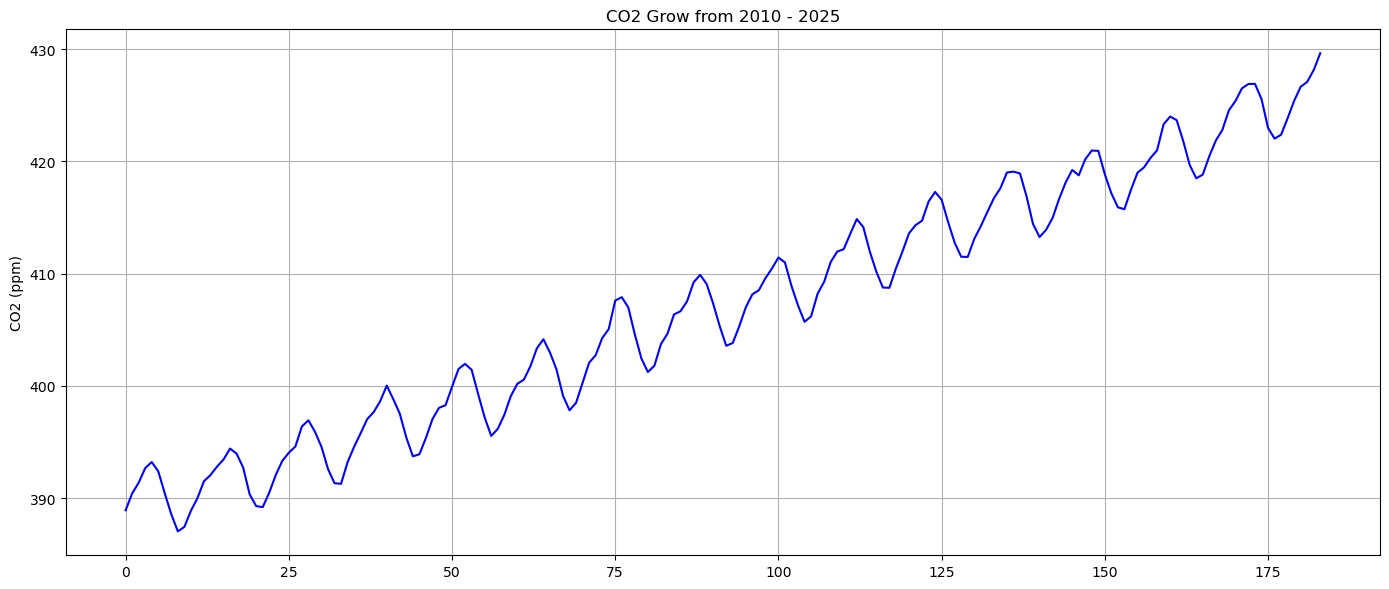

In [170]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Value'], 'b-')
plt.title('CO2 Grow from 2010 - 2025')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('../plots/time_series.png')
plt.show()

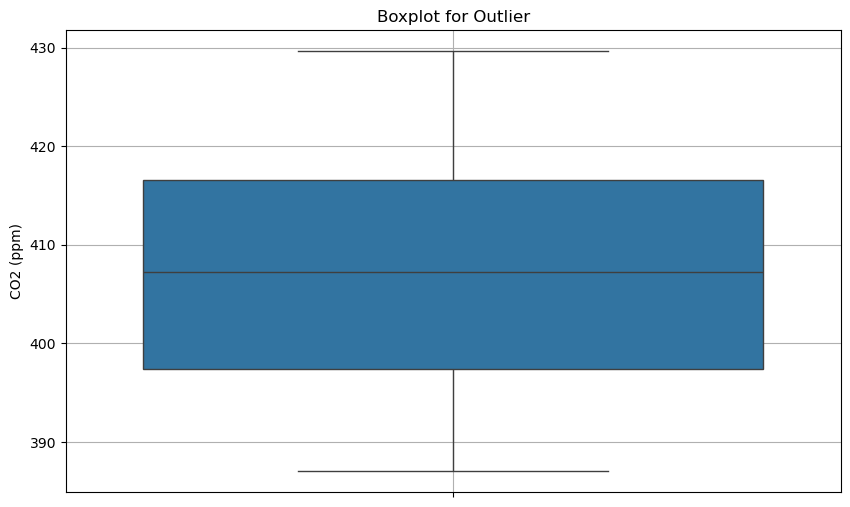


Outliers detected: 0


In [171]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Value'])
plt.title('Boxplot for Outlier')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.savefig('../plots/boxplot.png')
plt.show()

q1 = df['Value'].quantile(0.25)
q3 = df['Value'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]
print("\nOutliers detected:", len(outliers))
if len(outliers) > 0:
    print(outliers)

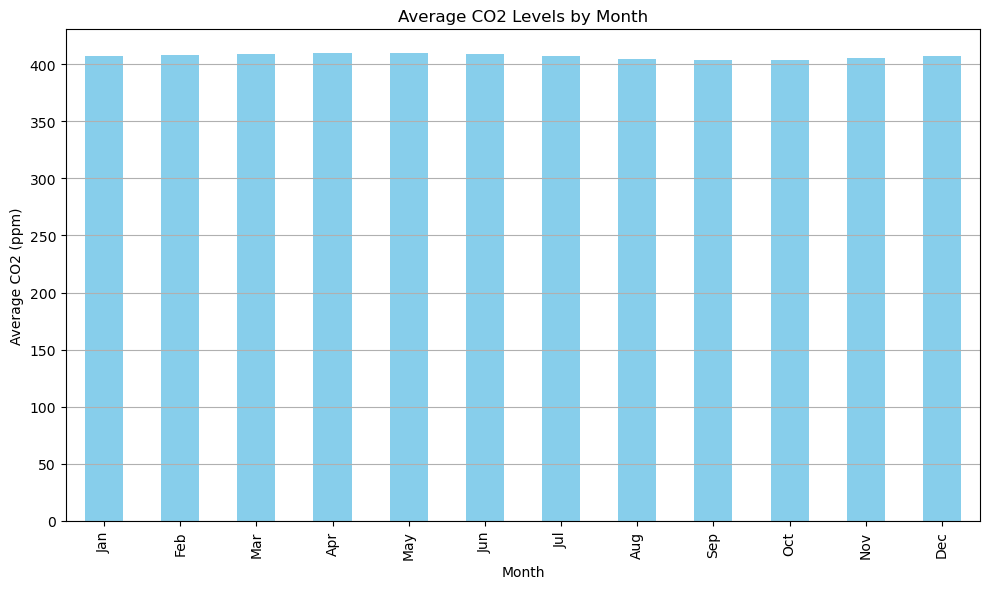

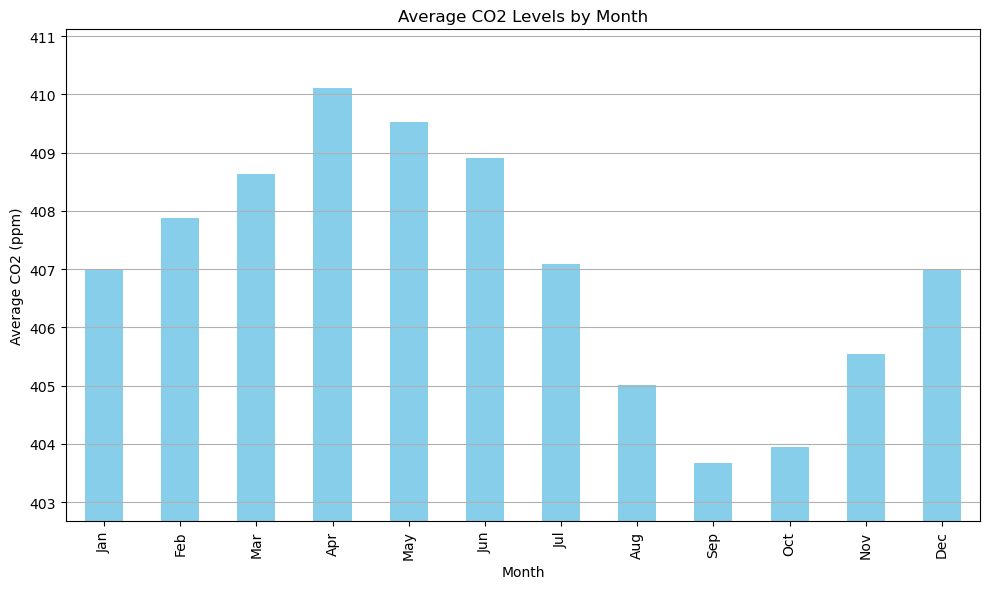

In [172]:
df['Month'] = pd.to_datetime(df['Date'], format='%YM%m').dt.month
monthly_avg = df.groupby('Month')['Value'].mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average CO2 Levels by Month')
plt.xlabel('Month')
plt.ylabel('Average CO2 (ppm)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('../plots/monthly_pattern.png')
plt.show()


# a more clearer change 
minVal = monthly_avg.min()
maxVal = monthly_avg.max()
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average CO2 Levels by Month')
plt.xlabel('Month')
plt.ylabel('Average CO2 (ppm)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(minVal - 1, maxVal + 1)  # tighten y-axis to the data range
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('../plots/monthly_pattern_zoom.png')
plt.show()

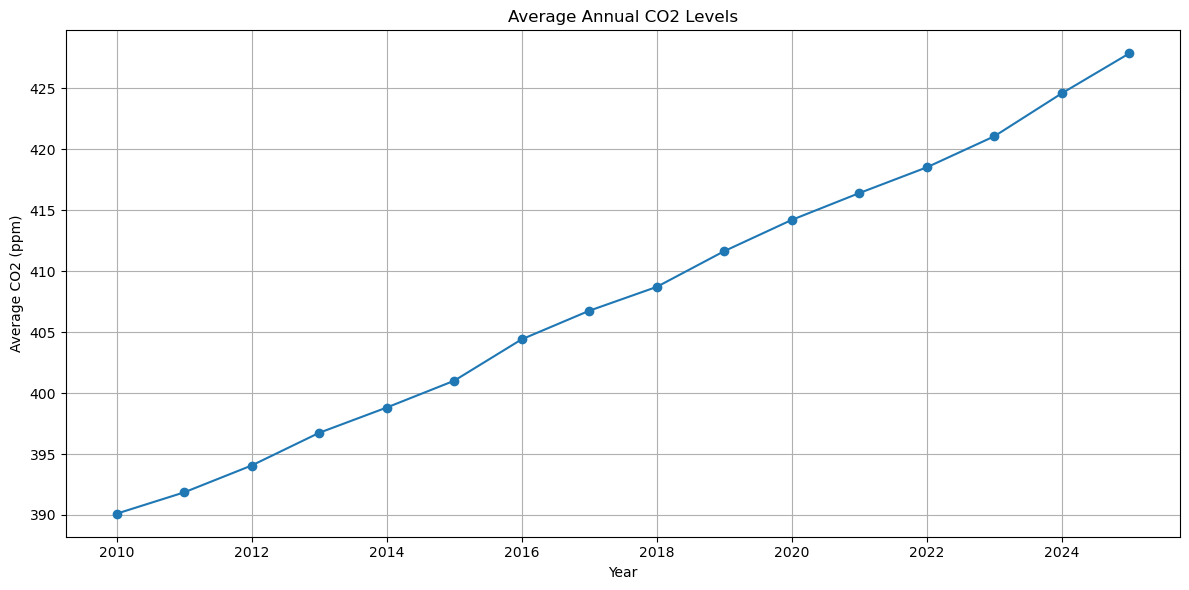

In [173]:
# yearly trend
df['Year'] = pd.to_datetime(df['Date'], format='%YM%m').dt.year
yearly_avg = df.groupby('Year')['Value'].mean()

plt.figure(figsize=(12, 6))
yearly_avg.plot(kind='line', marker='o')
plt.title('Average Annual CO2 Levels')
plt.xlabel('Year')
plt.ylabel('Average CO2 (ppm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('../plots/yearly_trend.png')
df = df.reset_index()
plt.show()

In [174]:
df = df[['Date', 'Value']]

outputPath = "/home/alie/kuliah/Sm4/Statistika/finale-statistika/preprocessed-data.csv"
df.to_csv(outputPath, index=False)
df

,Date,Value
0,2010-01-01,388.91
1,2010-02-01,390.41
2,2010-03-01,391.37
3,2010-04-01,392.67
4,2010-05-01,393.21
...,...,...
179,2024-12-01,425.40
180,2025-01-01,426.65
181,2025-02-01,427.09
182,2025-03-01,428.15
